In [2]:
import numpy as np
import scipy.optimize as scop
import matplotlib.pyplot as plt
from math import sin, exp

# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

## Задача 1. Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [66]:
def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [78]:
scop.minimize(f, x0 = 30, method = 'BFGS')

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

In [58]:
solution = scop.minimize(f, x0 = 2, method = 'BFGS')
with open("submission-1.text",'w',encoding='utf-8') as fout:
    print(round(solution.fun,2),end=' ',file=fout)

In [60]:
solution = scop.minimize(f, x0 = 30, method = 'BFGS')
with open("submission-1.text",'a',encoding='utf-8') as fout:
    print(round(solution.fun,2),end=' ',file=fout)

#### Результаты отличаются

Это потому метод градиентной оптимизации не ялвяется глобальной. Здесь мы получили некие локальные минимумы

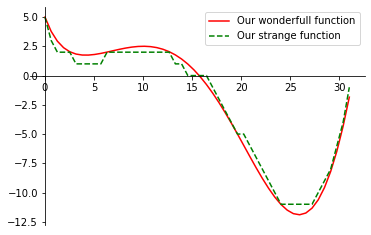

In [86]:
x = np.linspace(0,31)

y = np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)
z = list(map(int, y)) # Here is the function h(x) = int(f(x))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y,'r-',label='Our wonderfull function')
plt.plot(x,z,'g--',label='Our strange function')
plt.legend(loc = 'upper right')
plt.show()

## Задача 2. Глобальная оптимизация

Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

In [68]:
f(0)

5.0

In [96]:
global_solution = scop.differential_evolution(f,[(1,30)])
global_solution

     fun: -11.89889466598131
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019282])

In [97]:
with open("submission-2.text",'w',encoding='utf-8') as fout:
    print(round(global_solution.fun,2),end=' ',file=fout)

# Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [93]:
def h(x):
    return int(f(x))

In [101]:
h_min = scop.minimize(h, x0 = 30, method = 'BFGS')
with open("submission-3.text",'w',encoding='utf-8') as fout:
    print(round(h_min.fun,2),end=' ',file=fout)

In [102]:
h_global_min = scop.differential_evolution(h,[(1,30)])
with open("submission-3.text",'a',encoding='utf-8') as fout:
    print(round(h_global_min.fun,2),end='',file=fout)